1. 讀入資料，並判斷出那些數據格式不是數字，或是有缺失值。
2. 將非數字類型的資料進行編碼。
3. 填補缺失值。

In [3]:
import pandas as pd
import numpy as np

inputData = pd.read_csv("HW4_house-prices.csv")
inputDataCopy = inputData.copy()

textData = inputDataCopy.select_dtypes(include='object')
numericData = inputDataCopy.drop(textData.keys(), axis=1)

for key in numericData.keys():
    mean = numericData[key].mean()
    numericData[key].fillna(mean, inplace=True) # fill with mean number
  
encodedTextData = pd.get_dummies(textData)
inputData = numericData.join(encodedTextData)



4. 將資料切割成訓練集 70%，預測集 30%。分別使用 Linear、Ridge、及 Lasso 三種 regression 模型預測 Rating，並使用 MSE（Mean-Squared-Error）作為預測準確度的指標。比較那一種模型較佳。

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def trainPredictData(regModel):
    regModel.fit(trainData, trainLabel)
    prediction = linearReg.predict(testData)
    linearMse = mean_squared_error(testLabel, prediction)
    return linearMse


label = inputData["SalePrice"]
#print(label)
data = inputData.drop("SalePrice", axis=1)

trainData, testData, trainLabel, testLabel = train_test_split(data, label, test_size=0.3, random_state=42)
print(type(testLabel))
linearReg = linear_model.LinearRegression()
linearMse = trainPredictData(linearReg)
ridgeReg = linear_model.Ridge()
ridgeMse = trainPredictData(ridgeReg)
lassoReg = linear_model.Lasso()
lassoMse = trainPredictData(lassoReg)
# not yet get ratting

threeModeMseDict = {"linear": linearMse, "ridge": ridgeMse, "lasso": lassoMse}
smallestMse = min(linearMse, ridgeMse, lassoMse)

key = [key for key, value in threeModeMseDict.items() if value == smallestMse]
print("Best Model: " + key[0])



<class 'pandas.core.series.Series'>
Best Model: linear


C:\Users\BV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5. 依據最佳結果的模型，對預測集資料繪製出預測房價 vs 實際房價 之散佈(scatter plot)圖

[154500 325000 115000 159000 315500  75500 311500 146000  84500 135500
 145000 130000  81000 214000 181000 134500 183500 135000 118400 226000
 155000 210000 173500 129000 192000 153900 181134 141000 181000 208900
 127000 284000 200500 135750 255000 140000 138000 219500 310000  97000
 114500 205000 119500 253293 128500 117500 115000 127000 451950 144000
 119000 196000 115000 287000 144500 260000 213000 175000 107000 107500
  68500 154000 317000 264132 283463 243000 109000 305000  93500 176000
 118858 134000 109008  93500 611657 173000 348000 341000 141000 124900
 118000  67000 113000  91300 149500 133000 266000 190000 155900 155835
 153500 152000 124500 301000 136500 169990 205000 183900 204900 260000
 163500 224900 244000 132000 194000 156500 156000 275000 145000 135000
  60000 124000 127000 137500 213500 119000 107900 123000 112000 284000
 133000 149000 169000 207000 175000 137000 236000  79500 144000 162900
 185900 369900 197900 104000  35311 337500 367294 130250 230000 755000
 40300

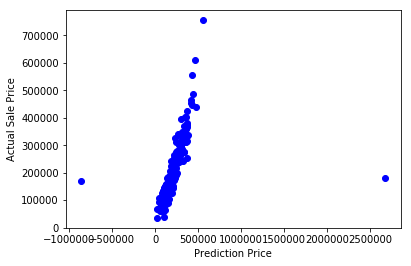

In [5]:
import matplotlib.pyplot as plt
prediction = linearReg.predict(testData)
print(testLabel.to_numpy())
print(prediction)
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(prediction, testLabel, c = 'blue')

plt.xlabel("Prediction Price")
plt.ylabel("Actual Sale Price")

plt.show()

6. 比較將特徵值進行標準化前處理後之預測準確度

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainDataScaled = scaler.fit_transform(trainData.astype(np.float64))
linearReg.fit(trainDataScaled, trainLabel)
prediction = linearReg.predict(testData)
scaledDataLinearMse = mean_squared_error(testLabel, prediction)
print("non scaled data: ",linearMse)
print("scaled data: ",scaledDataLinearMse)


non scaled data:  17446858340.047977
scaled data:  8.506302182755798e+32


7. 利用相關係數選取特徵使用：

利用 pandas 套件中 dataframe 之函數 corr()找出各特徵之間的
相關係數，並利用 seaborn 套件之 heatmap()函數繪製。

In [7]:
import seaborn as sns
corrMatrix = inputData.corr()
print(corrMatrix)
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

                             Id  MSSubClass   LotFrontage   LotArea  \
Id                     1.000000    0.011156 -9.600822e-03 -0.033226   
MSSubClass             0.011156    1.000000 -3.570559e-01 -0.139781   
LotFrontage           -0.009601   -0.357056  1.000000e+00  0.306795   
LotArea               -0.033226   -0.139781  3.067946e-01  1.000000   
OverallQual           -0.028365    0.032628  2.341962e-01  0.105806   
OverallCond            0.012609   -0.059316 -5.282010e-02 -0.005636   
YearBuilt             -0.012713    0.027850  1.175980e-01  0.014228   
YearRemodAdd          -0.021998    0.040581  8.274589e-02  0.013788   
MasVnrArea            -0.050199    0.022895  1.792835e-01  0.103960   
BsmtFinSF1            -0.005024   -0.069836  2.158284e-01  0.214103   
BsmtFinSF2            -0.005968   -0.065649  4.333957e-02  0.111170   
BsmtUnfSF             -0.007940   -0.140759  1.221556e-01 -0.002618   
TotalBsmtSF           -0.015415   -0.238518  3.633577e-01  0.260833   
1stFlr

僅使用與房價最相關的前四高係數之特徵進行預測

In [9]:
sortedCorr = sorted(corrMatrix["SalePrice"])
print(sortedCorr)

[-0.589043523409763, -0.5192978536548846, -0.45239353235010327, -0.41060831129167175, -0.3744676734554566, -0.3541407884127012, -0.34326299944465, -0.31267704543518154, -0.2880651218971229, -0.2676717602887954, -0.2636004118714215, -0.25132816384015727, -0.2425975172729481, -0.22474411621309415, -0.21262978253141168, -0.20411736578270182, -0.19397792356662585, -0.19218879886097048, -0.18851259699796893, -0.17994896448338463, -0.16706804265413477, -0.16405585189091604, -0.16346607100995758, -0.16238867058442932, -0.1618004951731797, -0.15861908165107155, -0.15719868628269335, -0.15398979048536723, -0.14364786671580496, -0.1406131649321044, -0.13919545817220863, -0.1379143994331373, -0.1359073708421417, -0.13566662734333607, -0.13472249330663544, -0.13375753334263013, -0.13314234807213166, -0.13291383782570232, -0.1327385517232977, -0.13077383506502996, -0.12872541129366055, -0.12857795792595636, -0.12839406550544274, -0.12660098635768133, -0.11974016023648001, -0.11806923061460167, -0.1

僅使用與房價最相關的前四低係數之特徵進行預測

比較使用前四高、前四低及所有特徵三種狀況所得到預測準
確度的差異

8. 利用 matplotlib 套件繪製特徵 GrLivArea 與房價 SalePrice 之散佈(scatter plot)圖，判斷是否有極端之 outliners，請將之移除後再比較預測準備度。